<a href="https://colab.research.google.com/github/skaty5678/Book-recommendation-system/blob/main/Book_Recommendation_System_SANJEEV_KUMAR_THAKUR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
raw_books = pd.read_csv('/content/drive/MyDrive/Books dataset/Copy of Books.csv')

In [4]:
raw_users = pd.read_csv('/content/drive/MyDrive/Books dataset/Copy of Users.csv')

In [5]:
raw_ratings = pd.read_csv('/content/drive/MyDrive/Books dataset/Copy of Ratings.csv')

#**BOOKS**

In [6]:
raw_books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [7]:
#making a copy
books = raw_books.copy()

###We will drop the columns that primarily don't seem important for the book recommendation.

In [8]:
#drop the columns that are not necessary
books.drop(columns=['Image-URL-S','Image-URL-M','Image-URL-L'],inplace = True)

In [9]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 5 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
dtypes: object(5)
memory usage: 10.4+ MB


In [10]:
dict = {'Book-Title': 'title',
        'Book-Author': 'author',
        'Year-Of-Publication': 'publication_year',
        'Publisher':'publisher'}

books.rename(columns=dict,inplace=True)

In [11]:
books.head()

,ISBN,title,author,publication_year,publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


In [12]:
books[books.isna().any(axis=1)]


,ISBN,title,author,publication_year,publisher
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN
187689,9627982032,The Credit Suisse Guide to Managing Your Perso...,NaN,1995,Edinburgh Financial Publishing


In [13]:
books.dropna(inplace=True) 


In [14]:
books.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271357 entries, 0 to 271359
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   ISBN              271357 non-null  object
 1   title             271357 non-null  object
 2   author            271357 non-null  object
 3   publication_year  271357 non-null  object
 4   publisher         271357 non-null  object
dtypes: object(5)
memory usage: 12.4+ MB


In [15]:
books['publication_year'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

In [16]:
#fixing the errors in the publication year column
books.loc[(books['publication_year'] == 'DK Publishing Inc') | (books['publication_year'] == 'Gallimard')]


,ISBN,title,author,publication_year,publisher
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...


In [17]:
books.drop(books[books['publication_year'] == 'DK Publishing Inc'].index, inplace = True)
books.drop(books[books['publication_year'] == 'Gallimard'].index, inplace = True)

In [18]:
books.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271354 entries, 0 to 271359
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   ISBN              271354 non-null  object
 1   title             271354 non-null  object
 2   author            271354 non-null  object
 3   publication_year  271354 non-null  object
 4   publisher         271354 non-null  object
dtypes: object(5)
memory usage: 12.4+ MB


In [19]:
#changing the publication year to int type before feeding it to the models
books['publication_year'] = books['publication_year'].astype('int')

In [20]:
print(sorted(books['publication_year'].unique()))

[0, 1376, 1378, 1806, 1897, 1900, 1901, 1902, 1904, 1906, 1908, 1909, 1910, 1911, 1914, 1917, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2008, 2010, 2011, 2012, 2020, 2021, 2024, 2026, 2030, 2037, 2038, 2050]


In [21]:
books.loc[(books['publication_year'] == 0)].value_counts()


ISBN        title                                       author                  publication_year  publisher                
0001046438  Liar                                        Stephen Fry             0                 Harpercollins Uk             1
1857992482  Mothers and Other Lovers                    Joanna Briscoe          0                 Phoenix House                1
1853268461  Frankenstein                                Mary Shelley            0                 Universal Sales Marketing    1
1853268445  Tales of Mystery and Imagination            Edgar Allan Poe         0                 Universal Sales Marketing    1
1853268380  Tess of the Durbervilles                    Thomas Hardy            0                 Universal Sales Marketing    1
                                                                                                                              ..
0571145620  The Spitting Image Treasure Island          Robert Loius Stevenson  0                 Fabe

###We have some entries in the publication year as 0 which might be due to some errors.We won't be dropping those entries as we will lose a good amount of data instead we will replace them with the mean year.As they are relevant for EDA purpose so that won't hamper our model performance, hopefully.

In [22]:
books.loc[(books['publication_year'] == 0)] = np.nan

In [23]:
books['publication_year'].fillna((books['publication_year'].mean()), inplace=True)


In [24]:
books['publication_year'] = books['publication_year'].astype('int')

In [25]:
print(sorted(books['publication_year'].unique()))

[1376, 1378, 1806, 1897, 1900, 1901, 1902, 1904, 1906, 1908, 1909, 1910, 1911, 1914, 1917, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2008, 2010, 2011, 2012, 2020, 2021, 2024, 2026, 2030, 2037, 2038, 2050]


In [26]:
print(books['publication_year'].nunique())

115


In [27]:
books['publication_year'].value_counts()[:10]

2002    17626
1999    17431
2001    17358
2000    17232
1998    15766
1993    15220
1997    14890
2003    14358
1996    14030
1995    13545
Name: publication_year, dtype: int64

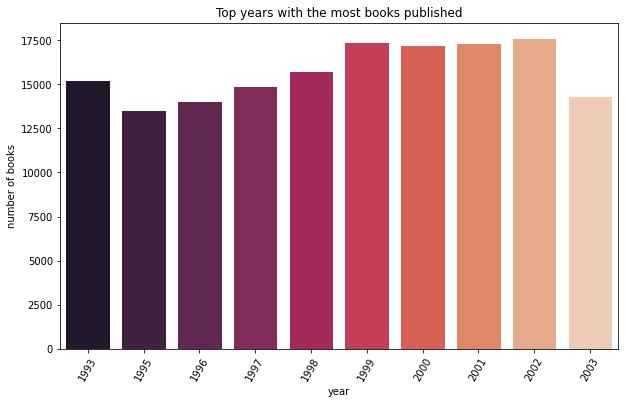

In [28]:
plt.subplots(figsize=(10,6))
sns.set_theme(style="darkgrid",context = 'notebook')
sns.barplot(x = books['publication_year'].value_counts()[:10].index,y = books['publication_year'].value_counts()[:10].values,
            palette = 'rocket').set(title = 'Top years with the most books published',xlabel = 'year',ylabel = 'number of books')
plt.xticks(rotation = 60)
plt.show()

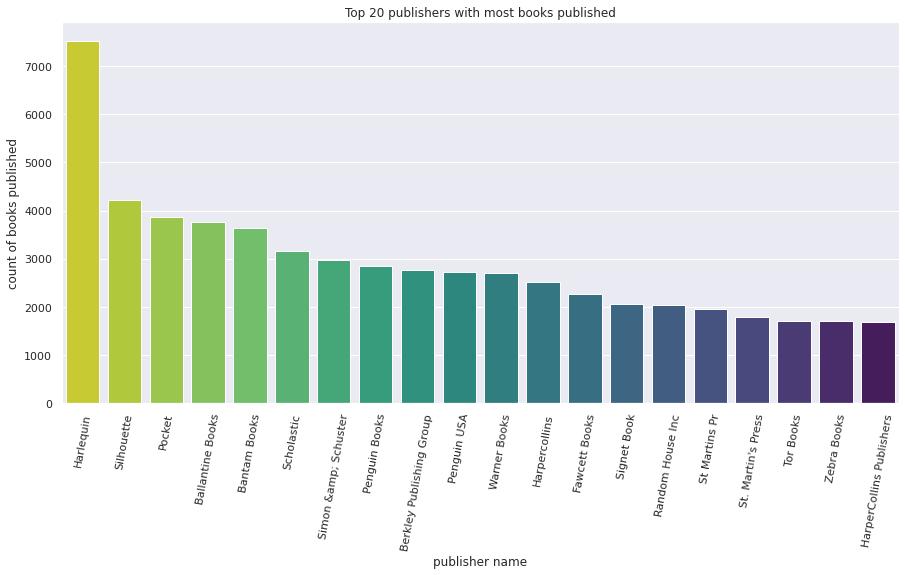

In [29]:
plt.subplots(figsize=(15,7))
sns.set_theme(style="darkgrid",context = 'notebook')
sns.barplot(x = books['publisher'].value_counts()[:20].index,y = books['publisher'].value_counts()[:20].values,
            palette = 'viridis_r').set(title = 'Top 20 publishers with most books published',xlabel = 'publisher name',ylabel = 'count of books published')
plt.xticks(rotation = 80)
plt.show()

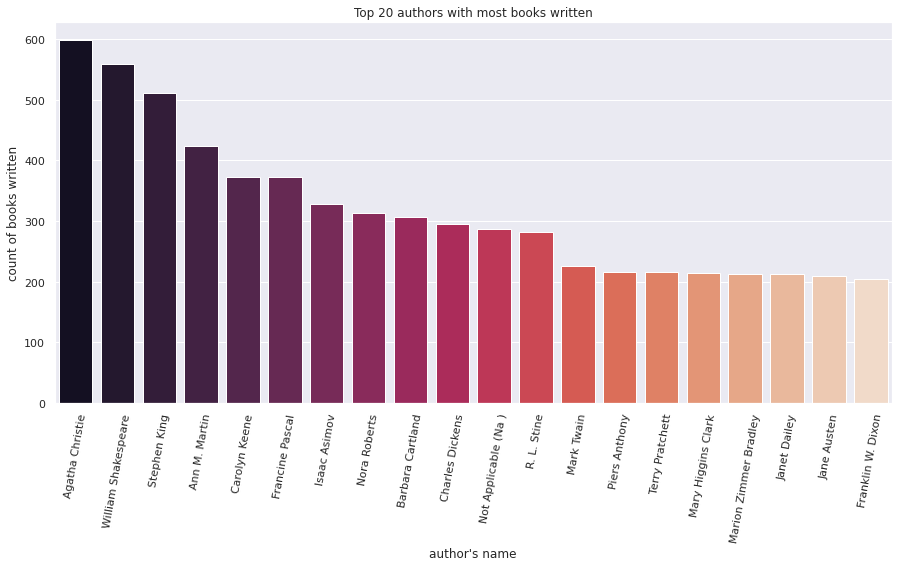

In [30]:
plt.subplots(figsize=(15,7))
sns.set_theme(style="darkgrid",context = 'notebook')
sns.barplot(x = books['author'].value_counts()[:20].index,y = books['author'].value_counts()[:20].values,
            palette = 'rocket').set(title = 'Top 20 authors with most books written',xlabel = "author's name",ylabel = 'count of books written')
plt.xticks(rotation = 80)
plt.show()

#**USERS**

In [31]:
users = raw_users.copy()

In [32]:
dict = {'User-ID': 'userID',
        'Age':'age'}

users.rename(columns=dict,inplace=True)

In [33]:
users.head()

,userID,Location,age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [34]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   userID    278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [35]:
print(sorted(users['age'].unique()))

[nan, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 113.0, 114.0, 115.0, 116.0, 118.0, 119.0, 123.0, 124.0, 127.0, 128.0, 132.0, 133.0, 136.0, 137.0, 138.0, 140.0, 141.0, 143.0, 146.0, 147.0, 148.0, 151.0, 152.0, 156.0, 157.0, 159.0, 162.0, 168.0, 172.0, 175.0, 183.0, 186.0, 189.0, 199.0, 200.0, 201.0, 204.0, 207.0, 208.0, 209.0, 210.0, 212.0, 219.0, 220.0, 223.0, 226.0

###We will keep the age group only from 5 years old to 85 years old and for the rest we will replace them with mean of the age.

In [36]:
users.loc[(users['age'] < 5) | (users['age'] > 85),'age'] = np.nan

In [37]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   userID    278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   age       166762 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [38]:
users['age'].fillna((users['age'].mean()), inplace=True)


In [39]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   userID    278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   age       278858 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [40]:
print(sorted(users['age'].unique()))

[5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 34.71685995610511, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0]


In [41]:
users.age.mean()

34.7168599561059

In [42]:
users['age'] = users['age'].astype('int')

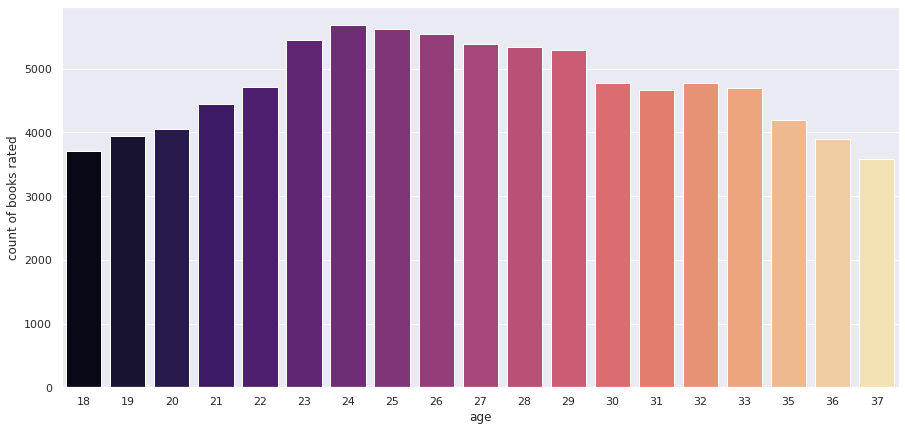

In [43]:
plt.subplots(figsize=(15,7))
sns.set_theme(style="darkgrid",context = 'notebook')
sns.barplot(x = users['age'].value_counts()[1:20].index,y = users['age'].value_counts()[1:20].values,
            palette = 'magma').set(xlabel = "age",ylabel = 'count of books rated')
plt.show()

#**RATINGS**

In [44]:
ratings = raw_ratings.copy()

In [45]:
dict = {'User-ID': 'userID',
        'Book-Rating':'book_rating'}

ratings.rename(columns=dict,inplace=True)

In [46]:
ratings['book_rating'].unique()

array([ 0,  5,  3,  6,  8,  7, 10,  9,  4,  1,  2])

In [47]:
ratings.shape

(1149780, 3)

In [48]:
# keeping only the records of ratings for the books and users whose data is there in the respective users and books csv file
new_ratings = ratings[ratings['ISBN'].isin(books['ISBN'])]
new_ratings = new_ratings[new_ratings['userID'].isin(users['userID'])]


In [49]:
new_ratings.head()

,userID,ISBN,book_rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [50]:
new_ratings.shape

(1017120, 3)

In [51]:
new_ratings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017120 entries, 0 to 1149778
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   userID       1017120 non-null  int64 
 1   ISBN         1017120 non-null  object
 2   book_rating  1017120 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 31.0+ MB


In [52]:
new_ratings = new_ratings.loc[new_ratings['book_rating'] != 0]

In [53]:
new_ratings.shape

(378055, 3)

In [54]:
new_ratings['userID'].value_counts()[:10]

11676     6782
98391     5689
189835    1898
153662    1833
23902     1102
235105    1017
76499     1011
16795      956
171118     954
248718     935
Name: userID, dtype: int64

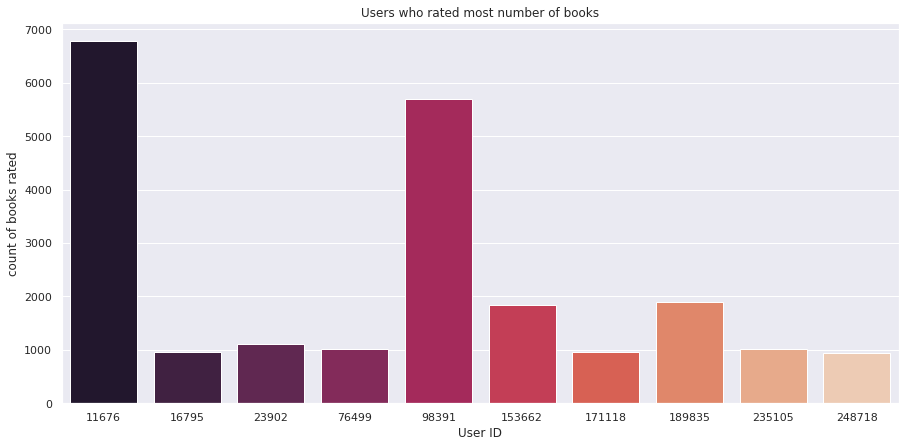

In [55]:
plt.subplots(figsize=(15,7))
sns.set_theme(style="darkgrid",context = 'notebook')
sns.barplot(x = new_ratings['userID'].value_counts()[0:10].index,y = new_ratings['userID'].value_counts()[0:10].values,
            palette = 'rocket').set(title="Users who rated most number of books",xlabel = "User ID",ylabel = 'count of books rated')
plt.show()

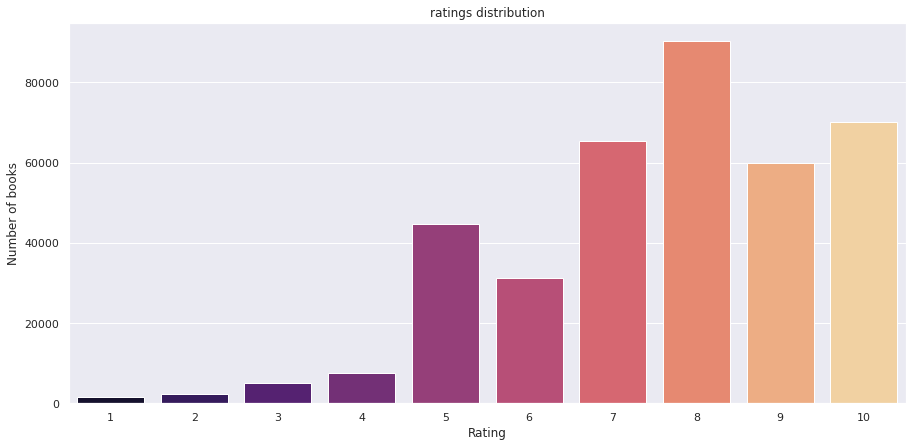

In [56]:
plt.subplots(figsize=(15,7))
sns.set_theme(style="darkgrid",context = 'notebook')
sns.barplot(x = new_ratings['book_rating'].value_counts().index,y = new_ratings['book_rating'].value_counts().values,
            palette = 'magma').set(title="ratings distribution",xlabel = "Rating",ylabel = 'Number of books')
plt.show()

#**POPULARITY BASED MODEL**

##Highest total book rating
###Books are arranged in such a way that the books with the highest sum total of ratings are at the top. 

In [57]:
ratings_sum=pd.DataFrame(new_ratings.groupby(['ISBN'])['book_rating'].sum())

In [58]:
merged_df_1 = ratings_sum.merge(books, left_index=True, right_on ='ISBN')

In [59]:
final_sum_df = merged_df_1.sort_values(by=['book_rating'], ascending=False)

In [60]:
final_sum_df.head(10)

,book_rating,ISBN,title,author,publication_year,publisher
408,5787,0316666343,The Lovely Bones: A Novel,Alice Sebold,2002,"Little, Brown"
748,4108,0385504209,The Da Vinci Code,Dan Brown,2003,Doubleday
522,3134,0312195516,The Red Tent (Bestselling Backlist),Anita Diamant,1998,Picador USA
2143,2798,059035342X,Harry Potter and the Sorcerer's Stone (Harry P...,J. K. Rowling,1999,Arthur A. Levine Books
356,2595,0142001740,The Secret Life of Bees,Sue Monk Kidd,2003,Penguin Books
26,2551,0971880107,Wild Animus,Rich Shapero,2004,Too Far
1105,2524,0060928336,Divine Secrets of the Ya-Ya Sisterhood: A Novel,Rebecca Wells,1997,Perennial
706,2402,0446672211,Where the Heart Is (Oprah's Book Club (Paperba...,Billie Letts,1998,Warner Books
231,2219,0452282152,Girl with a Pearl Earring,Tracy Chevalier,2001,Plume Books
118,2179,0671027360,Angels &amp; Demons,Dan Brown,2001,Pocket Star


##Most number of times rated

In [61]:
ratings_count=pd.DataFrame(new_ratings.groupby(['ISBN'])['book_rating'].count())


In [62]:
merged_df_2 = ratings_count.merge(books, left_index=True, right_on ='ISBN')

In [63]:
final_count_df = merged_df_2.sort_values(by=['book_rating'], ascending=False)


In [64]:
final_count_df.head(10)


,book_rating,ISBN,title,author,publication_year,publisher
408,707,0316666343,The Lovely Bones: A Novel,Alice Sebold,2002,"Little, Brown"
26,581,0971880107,Wild Animus,Rich Shapero,2004,Too Far
748,487,0385504209,The Da Vinci Code,Dan Brown,2003,Doubleday
522,383,0312195516,The Red Tent (Bestselling Backlist),Anita Diamant,1998,Picador USA
1105,320,0060928336,Divine Secrets of the Ya-Ya Sisterhood: A Novel,Rebecca Wells,1997,Perennial
2143,313,059035342X,Harry Potter and the Sorcerer's Stone (Harry P...,J. K. Rowling,1999,Arthur A. Levine Books
356,307,0142001740,The Secret Life of Bees,Sue Monk Kidd,2003,Penguin Books
706,295,0446672211,Where the Heart Is (Oprah's Book Club (Paperba...,Billie Letts,1998,Warner Books
305,281,044023722X,A Painted House,John Grisham,2001,Dell Publishing Company
231,278,0452282152,Girl with a Pearl Earring,Tracy Chevalier,2001,Plume Books


#**MEMORY BASED COLLABORATIVE FILTERING - ITEM BASED**

In [110]:
merge_df_1=books.merge(ratings,how="left", on="ISBN")
merge_df_2=merge_df_1.merge(users,how="left", on="userID")
df=merge_df_2.copy()
df.head()

,ISBN,title,author,publication_year,publisher,userID,book_rating,Location,age
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,2.0,0.0,"stockton, california, usa",18.0
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,8.0,5.0,"timmins, ontario, canada",34.0
2,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,11400.0,0.0,"ottawa, ontario, canada",49.0
3,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,11676.0,8.0,"n/a, n/a, n/a",34.0
4,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,41385.0,0.0,"sudbury, ontario, canada",34.0


In [111]:
df.drop(['Location','age'], axis=1, inplace=True)


In [112]:
df.shape

(1022926, 7)

In [113]:
df = df[df["book_rating"]>0]

In [114]:
df.head()

,ISBN,title,author,publication_year,publisher,userID,book_rating
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,8.0,5.0
3,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,11676.0,8.0
5,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,67544.0,8.0
8,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,116866.0,9.0
9,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,123629.0,9.0


In [116]:
df.shape

(378055, 7)

In [117]:
count_of_books = pd.DataFrame(df["title"].value_counts())

In [118]:
count_of_books.sort_values("title", ascending=False)

,title
The Lovely Bones: A Novel,707
Wild Animus,581
The Da Vinci Code,494
The Secret Life of Bees,406
The Nanny Diaries: A Novel,393
...,...
I Couldn't Care Less,1
The Starplace (Novel),1
A Woman and Catholicism: My Break With the Roman Catholic Church,1
Trove,1


In [119]:
rare_books = count_of_books[count_of_books["title"] <= 100].index

In [120]:
frequent_books = df[~df["title"].isin(rare_books)]
frequent_books.head()

,ISBN,title,author,publication_year,publisher,userID,book_rating
31,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,11676.0,9.0
32,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,29526.0,9.0
34,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,46398.0,9.0
36,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,49635.0,9.0
37,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,67958.0,10.0


In [121]:
#User-Book matrix
books_user_df = frequent_books.pivot_table(index=["userID"], columns=["title"], values="book_rating",fill_value=0)
books_user_df.head()

title,1984,1st to Die: A Novel,2nd Chance,A Bend in the Road,"A Child Called \It\"": One Child's Courage to Survive""",A Heartbreaking Work of Staggering Genius,A Is for Alibi (Kinsey Millhone Mysteries (Paperback)),A Map of the World,A Painted House,A Prayer for Owen Meany,A Time to Kill,A Walk in the Woods: Rediscovering America on the Appalachian Trail (Official Guides to the Appalachian Trail),A Walk to Remember,ANGELA'S ASHES,About a Boy,Airframe,Along Came a Spider (Alex Cross Novels),American Gods,Angela's Ashes (MMP) : A Memoir,Angels &amp; Demons,Animal Farm,"Artemis Fowl (Artemis Fowl, Book 1)",Back Roads,Balzac and the Little Chinese Seamstress : A Novel,Bel Canto: A Novel,Black House,Black Notice,Brave New World,Bridget Jones's Diary,Bridget Jones: The Edge of Reason,Chocolat,Cold Mountain : A Novel,Confessions of a Shopaholic (Summer Display Opportunity),Cradle and All,Dance upon the Air (Three Sisters Island Trilogy),Digital Fortress : A Thriller,Divine Secrets of the Ya-Ya Sisterhood: A Novel,Dolores Claiborne,Dreamcatcher,Empire Falls,...,The No. 1 Ladies' Detective Agency (Today Show Book Club #8),The Notebook,The Partner,The Pelican Brief,The Perfect Storm : A True Story of Men Against the Sea,The Pilot's Wife : A Novel,The Poisonwood Bible,The Poisonwood Bible: A Novel,The Rainmaker,The Reader,The Red Tent (Bestselling Backlist),The Rescue,"The Return of the King (The Lord of the Rings, Part 3)",The Runaway Jury,The Secret Life of Bees,The Smoke Jumper,The Street Lawyer,"The Subtle Knife (His Dark Materials, Book 2)",The Summons,The Tao of Pooh,The Testament,"The Two Towers (The Lord of the Rings, Part 2)","The Vampire Lestat (Vampire Chronicles, Book II)",The Witching Hour (Lives of the Mayfair Witches),Timeline,To Kill a Mockingbird,"Tuesdays with Morrie: An Old Man, a Young Man, and Life's Greatest Lesson",Two for the Dough,Unnatural Exposure,Violets Are Blue,Watership Down,We Were the Mulvaneys,When the Wind Blows,Where the Heart Is (Oprah's Book Club (Paperback)),While I Was Gone,White Oleander : A Novel,White Oleander : A Novel (Oprah's Book Club),Wicked: The Life and Times of the Wicked Witch of the West,Wild Animus,"\O\"" Is for Outlaw"""
userID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
16.0,0,0.0,0.0,0.0,0,0,0,0,0.0,0,0,0,0.0,0,0,9,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0.0,0,0,0.0,0,0.0,0,0.0,0.0,0,...,0,0.0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0,0
26.0,0,0.0,0.0,0.0,0,0,0,0,0.0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0.0,0,0,0.0,0,0.0,0,0.0,0.0,0,...,0,0.0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,10,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0,0
32.0,0,0.0,0.0,0.0,0,0,0,0,0.0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0.0,0,0,0.0,0,0.0,0,0.0,0.0,0,...,0,0.0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0,0
51.0,0,0.0,0.0,0.0,0,0,0,0,0.0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0.0,0,0,0.0,0,0.0,0,0.0,0.0,0,...,0,0.0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,0.0,0,9.0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0,0
91.0,0,0.0,0.0,0.0,0,0,0,0,0.0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0.0,0,0,0.0,0,0.0,0,0.0,0.0,0,...,0,0.0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0,0


In [122]:
book="To Kill a Mockingbird"


In [123]:
book=books_user_df[book]
book.sort_values(ascending=False)

userID
106007.0    10
128622.0    10
37712.0     10
80684.0     10
95359.0     10
            ..
93312.0      0
93314.0      0
93333.0      0
93358.0      0
278846.0     0
Name: To Kill a Mockingbird, Length: 16349, dtype: int64

In [124]:
books_user_df.corrwith(book,method='pearson').sort_values(ascending=False)[:10]


title
To Kill a Mockingbird                                            1.000000
Lord of the Flies                                                0.081590
The Catcher in the Rye                                           0.080984
The Color Purple                                                 0.072714
Brave New World                                                  0.070907
Fried Green Tomatoes at the Whistle Stop Cafe                    0.062260
Snow Falling on Cedars                                           0.058128
Animal Farm                                                      0.057240
The Color of Water: A Black Man's Tribute to His White Mother    0.055991
Harry Potter and the Chamber of Secrets (Book 2)                 0.054521
dtype: float64

In [125]:
recommend_books=books_user_df.corrwith(book).sort_values(ascending=False)[:10]
rec_books_list=list(recommend_books.index)

rec_books_list

['To Kill a Mockingbird',
 'Lord of the Flies',
 'The Catcher in the Rye',
 'The Color Purple',
 'Brave New World',
 'Fried Green Tomatoes at the Whistle Stop Cafe',
 'Snow Falling on Cedars',
 'Animal Farm',
 "The Color of Water: A Black Man's Tribute to His White Mother",
 'Harry Potter and the Chamber of Secrets (Book 2)']

#**MODEL BASED COLLABORATIVE FILTERING**